In [1]:
import pandas as pd
dup=pd.read_excel('C:/Users/satya/Desktop/Capstone/Emergency Dataset.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [2]:
dup.columns

Index(['member_id', 'cd_gender', 'birth_year', 'age', 'zip3', 'chr_count',
       'chr_htn', 'chr_copd', 'chr_asthma', 'chr_cad', 'chr_hf', 'chr_bh',
       'dialysis_treatment', 'renal_failure', 'kidney_transplant',
       'nephropathy', 'retinopathy', 'tobacco_use', 'obesity', 'limb_loss',
       'EM_MEMBER', 'NO_CLAIM_ID', 'LOS', 'ED_AVOIDABLE_DX', 'IS_SUBACUTE',
       'EXTENDED_LOS', 'WELLNESS_EXAM', 'NEPHROPATHY_SCREENING',
       'HBA1C_SCREENING', 'HBA1C_ABOVE_9', 'ROUTINE_FOOT_CARE',
       'RETINAL_SCREENING', 'EM_COUNTS'],
      dtype='object')

In [3]:
dup['cd_gender']=dup.cd_gender.map({'M':1,'F':0})
x = dup.loc[:, ~dup.columns.isin(['member_id','birth_year','EM_MEMBER','EM_COUNTS'])]
y= dup['EM_MEMBER']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [4]:
dup

,member_id,cd_gender,birth_year,age,zip3,chr_count,chr_htn,chr_copd,chr_asthma,chr_cad,...,ED_AVOIDABLE_DX,IS_SUBACUTE,EXTENDED_LOS,WELLNESS_EXAM,NEPHROPATHY_SCREENING,HBA1C_SCREENING,HBA1C_ABOVE_9,ROUTINE_FOOT_CARE,RETINAL_SCREENING,EM_COUNTS
0,2331757,0,1961,58,490,1,1,0,0,0,...,27,0,0,0,2,7,0,0,0,1
1,2331851,1,1969,50,484,3,1,0,1,0,...,26,0,0,0,3,2,0,0,1,1
2,2331890,1,1959,60,490,2,1,0,0,0,...,12,3,0,0,1,4,0,0,1,1
3,2331934,1,1966,53,487,4,1,1,1,0,...,11,0,0,0,1,0,0,0,0,7
4,2331969,1,1956,63,487,4,1,1,0,0,...,11,0,2,1,2,4,0,0,0,2
5,2331979,1,1961,58,487,0,0,0,0,0,...,10,0,0,0,0,1,0,0,0,0
6,2332011,1,1961,58,486,2,1,0,0,0,...,15,0,0,0,8,10,0,0,0,2
7,2332025,0,1957,62,487,4,1,1,0,1,...,8,0,0,1,2,5,0,0,3,7
8,2332028,0,1958,61,490,2,0,1,0,0,...,27,0,0,1,2,6,0,0,0,2
9,2332041,1,1965,54,491,2,1,0,0,0,...,9,0,0,0,0,4,0,0,0,0


# RANDOM FOREST

In [5]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators = 280,max_depth = 4)
rfc.fit(X_train, y_train)

#predictions
rfc_predict = rfc.predict(X_test)
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [10]:
feat_importances

cd_gender                0.001515
age                      0.082320
zip3                     0.003439
chr_count                0.113546
chr_htn                  0.003276
chr_copd                 0.020212
chr_asthma               0.045442
chr_cad                  0.008551
chr_hf                   0.011652
chr_bh                   0.050495
dialysis_treatment       0.000518
renal_failure            0.005565
kidney_transplant        0.000078
nephropathy              0.000193
retinopathy              0.000133
tobacco_use              0.017193
obesity                  0.002358
limb_loss                0.000178
NO_CLAIM_ID              0.190571
LOS                      0.333594
ED_AVOIDABLE_DX          0.082472
IS_SUBACUTE              0.000481
EXTENDED_LOS             0.001991
WELLNESS_EXAM            0.002888
NEPHROPATHY_SCREENING    0.003868
HBA1C_SCREENING          0.015984
HBA1C_ABOVE_9            0.000300
ROUTINE_FOOT_CARE        0.000242
RETINAL_SCREENING        0.000943
dtype: float64

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,rfc_predict)
accuracy_score(y_test,rfc_predict)

0.7576

In [8]:
train_predict = rfc.predict(X_train)
accuracy_score(y_train,train_predict)

0.7534666666666666

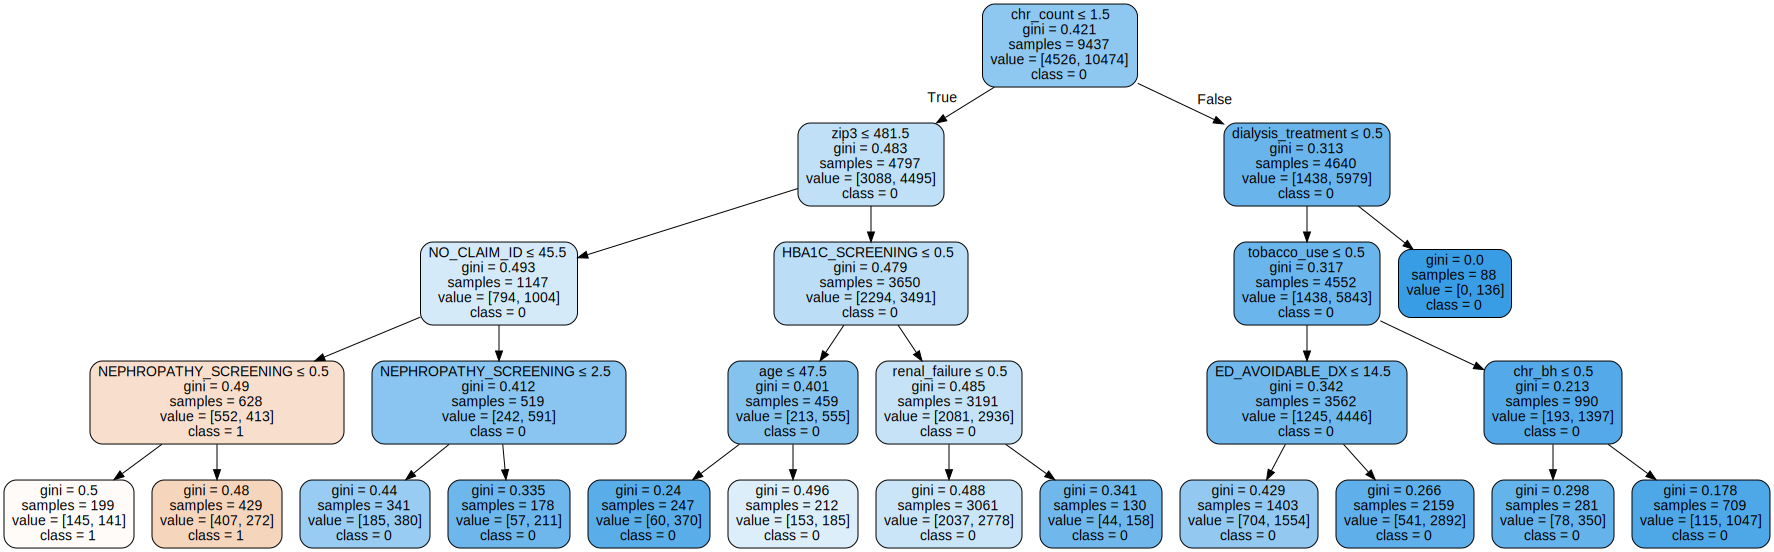

In [9]:
tree = rfc.estimators_[120]
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
feat_names = x.columns
targ_names = ['1','0']
ghj = export_graphviz(tree,out_file=None,feature_names=feat_names,class_names=targ_names,   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(ghj)
graph
